In [2]:
from pfx_functions import *
%matplotlib inline

# pfx_functions와 같은 경로에 pfx 데이터 파일 위치.
pfxfile = open('pbp_data/2017/2017_pfx.csv', 'r')

cr = csv.DictReader(pfxfile)
data = []
for row in cr:
    data.append(row)

In [3]:
v, _ = get_results(data, date_start=170301, date_end=171231, light=True)

S-Zone size: 581 sq.inch
S-Zone size: 439 sq.inch


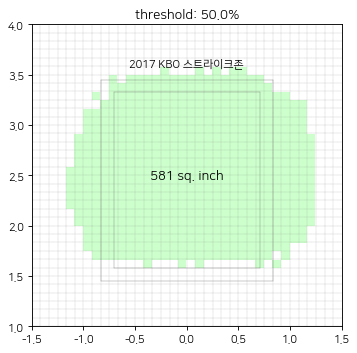

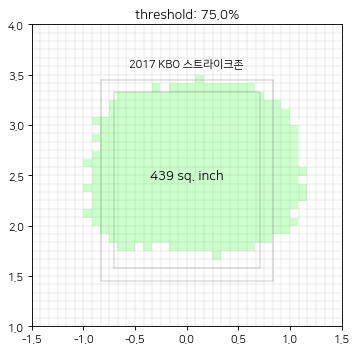

In [4]:
threshold = [0.5, 0.75]

for th in threshold:
    plot_szone(v, threshold=th, title='2017 KBO 스트라이크존', show_area=True)

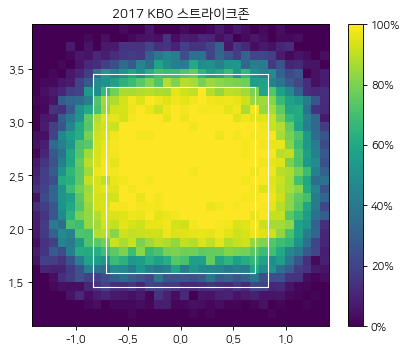

In [5]:
plot_heatmap(v, title='2017 KBO 스트라이크존')